In [77]:
from PIL import Image
import cv2
import numpy as np
import base64
import io
import json

In [44]:
sample_image_path = '/home/ubuntu/repositories/sudoku-ml-vision-app/temporary/sudoku-grid-images/manual-extracts/grid-7.PNG'

## Loading from disk & convert to array

### PIL

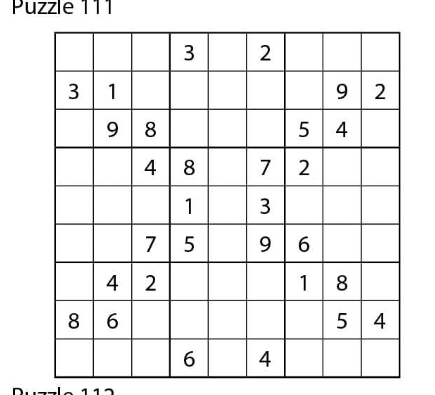

In [45]:
# PIL
pil_image = Image.open(sample_image_path)
pil_image

In [46]:
pil_array = np.asarray(pil_image)

# png images have 4th transparency channel that cv2 doesnt seem to capture
pil_array = pil_array[:,:,:3]

# PIL reads color chanels RGB, while cv2 reads BGR
pil_array = np.flip(pil_array,axis=2)
pil_array.shape

(395, 435, 3)

In [47]:
type(pil_array)

numpy.ndarray

### Open CV

In [48]:
# open cv
cv2_image = cv2.imread(sample_image_path) # reads in BGR color channel ordering
type(cv2_image)

numpy.ndarray

In [49]:
cv2_image.shape

(395, 435, 3)

In [50]:
np.testing.assert_array_equal(cv2_image,pil_array)

## Encoding & decoding from disk

### PIL

In [109]:
# encode to simluate http request payload
with open(sample_image_path, 'rb') as open_file:
        im_bytes = open_file.read()
            
im_b64 = base64.b64encode(im_bytes).decode("utf8")

payload = json.dumps({"instances": [im_b64]})
payload

'{"instances": ["iVBORw0KGgoAAAANSUhEUgAAAbMAAAGLCAYAAABNxHxHAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAJoRSURBVHhe7b0H2CTFde5vCwlJREtmiTaZK+ISVwgQYILBJJHDXdKS1uQskXMWOUrkJBCwcEGAydiXbEyOJoucg5Csm+/t//M72vf7H0Y9M1U9X880s+d9nnp65nR19ekK5+0Kfeovigz8v//3/4r//b//d/Htb3+7+Mu//EuT/Z//839G5I8++mjxN3/zN8U3vvGN4qyzzrLz4Pe//33x3/7bf7N4f/zjH03G7//7f/9v8d//+38v/tf/+l92VFqA35wXiMM55PqtNP/n//yfdn+lB/hNIP4XX3xRfOtb3yq++c1vmi7E5brf/e53I/fU/XQN+B//43/Y0afNUffXuX/5l38pZppppmKuueYqttlmG8uff/iHfxhJU0eu43jnnXcWM888c7HAAgsUW265ZTHjjDMWP/nJT0buJ5A2+UX6s88+ezH//PMXm2++eTH99NMX48eP/7P4gUAgMKWiEplNPfXUI2SGDCOtcM455xhxrLLKKkY2EA1GFyJ49913zZgD4kImnCMO6WC4db4VIg+lRTxk//Ef/zHym6OICLz++usj5yCAqaaayq7n3q2ExX/kX3755cg5f09k+u/BNS+//HKx3377FXfffXfx9NNPF3/1V39VLL/88iPxyTOeUXj22WeLXXbZxUjqmWeesfzcYostTFfuxZEgEn377beLHXfcsbjrrruKhx9+2MhyvfXWm5xaIBAIBHomM4wtpIVR59zjjz9u56aZZhqLD/HccccdZuBXWmmlkZ6TCIP/O++8sxnoI444wmS//e1vi4UXXrj4i7/4CyNGzuk3vavvfve7xR577GHk8bd/+7emz3TTTWfx6BVyf+KOGTOmuOCCC6w3hpxrRRY

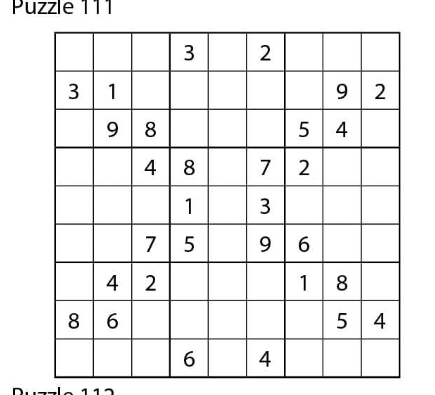

In [83]:
# decode to simluate service parsing & decoding logic
instance_b64 = json.loads(payload)['instances'][0]
im_b = base64.b64decode(instance_b64)
image = io.BytesIO(im_b)
Image.open(image)

### CV2

In [107]:
# encode to simluate http request payload
with open(sample_image_path, 'rb') as open_file:
        im_bytes = open_file.read()
            
im_b64 = base64.b64encode(im_bytes).decode("utf8")

payload = json.dumps({"instances": [im_b64]})
payload

'{"instances": ["iVBORw0KGgoAAAANSUhEUgAAAbMAAAGLCAYAAABNxHxHAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAJoRSURBVHhe7b0H2CTFde5vCwlJREtmiTaZK+ISVwgQYILBJJHDXdKS1uQskXMWOUrkJBCwcEGAydiXbEyOJoucg5Csm+/t//M72vf7H0Y9M1U9X880s+d9nnp65nR19ekK5+0Kfeovigz8v//3/4r//b//d/Htb3+7+Mu//EuT/Z//839G5I8++mjxN3/zN8U3vvGN4qyzzrLz4Pe//33x3/7bf7N4f/zjH03G7//7f/9v8d//+38v/tf/+l92VFqA35wXiMM55PqtNP/n//yfdn+lB/hNIP4XX3xRfOtb3yq++c1vmi7E5brf/e53I/fU/XQN+B//43/Y0afNUffXuX/5l38pZppppmKuueYqttlmG8uff/iHfxhJU0eu43jnnXcWM888c7HAAgsUW265ZTHjjDMWP/nJT0buJ5A2+UX6s88+ezH//PMXm2++eTH99NMX48eP/7P4gUAgMKWiEplNPfXUI2SGDCOtcM455xhxrLLKKkY2EA1GFyJ49913zZgD4kImnCMO6WC4db4VIg+lRTxk//Ef/zHym6OICLz++usj5yCAqaaayq7n3q2ExX/kX3755cg5f09k+u/BNS+//HKx3377FXfffXfx9NNPF3/1V39VLL/88iPxyTOeUXj22WeLXXbZxUjqmWeesfzcYostTFfuxZEgEn377beLHXfcsbjrrruKhx9+2MhyvfXWm5xaIBAIBHomM4wtpIVR59zjjz9u56aZZhqLD/HccccdZuBXWmmlkZ6TCIP/O++8sxnoI444wmS//e1vi4UXXrj4i7/4CyNGzuk3vavvfve7xR577GHk8bd/+7emz3TTTWfx6BVyf+KOGTOmuOCCC6w3hpxrRRY

In [108]:
# decode to simluate service parsing & decoding logic
instance_b64 = json.loads(payload)['instances'][0]
im_b = base64.b64decode(instance_b64)
image_arr = np.frombuffer(im_b, np.uint8)
cv2_image_decoded = cv2.imdecode(image_arr, cv2.IMREAD_COLOR) # reads BGR color channel ordering (like the cv2.imread function - see above)

In [86]:
type(cv2_image_decoded)

numpy.ndarray

In [87]:
cv2_image_decoded.shape

(395, 435, 3)

In [88]:
np.testing.assert_array_equal(cv2_image,cv2_image_decoded)

## Writing and re-reading from array

### CV2

In [110]:
cv2_image_array = cv2.imread(sample_image_path)
cv2_image_array_g = cv2.cvtColor(cv2_image_array, cv2.COLOR_BGR2GRAY)

In [111]:
cv2_image_array.shape, cv2_image_array_g.shape

((395, 435, 3), (395, 435))

In [113]:
cv2.imwrite('./cv2_image_temp.png',cv2_image_array)
cv2.imwrite('./cv2_image_gray_temp.png',cv2_image_array_g)

True

In [114]:
cv2_image_array_reloaded = cv2.imread('./cv2_image_temp.png')
cv2_image_array_g_reloaded = cv2.imread('./cv2_image_gray_temp.png') # the one channel property of gray scale cv2 image arrays is not persisted across write & read operations

In [118]:
np.allclose(cv2_image_array_reloaded,cv2_image_array)
# the one channel property of gray scale cv2 image arrays is not persisted across write & read operations
# cv2 simply copies the one array into all three BGR channels
np.allclose(cv2_image_array_g_reloaded[:,:,0],cv2_image_array_g)
np.allclose(cv2_image_array_g_reloaded[:,:,1],cv2_image_array_g)
np.allclose(cv2_image_array_g_reloaded[:,:,2],cv2_image_array_g)

True